In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('InputFile.csv')

In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative


In [4]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [5]:
data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG','TSH'], axis=1)

In [6]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'referral_source', 'Class'],
      dtype='object')

In [7]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    print(column,count)

age 1
sex 150
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
T3 769
TT4 231
T4U 387
FTI 385
referral_source 0
Class 0


In [8]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    if count!=0:
        data[column] = data[column].replace('?',np.nan)

In [9]:
for column in data.columns:
    count = data[column][data[column]=='?'].count()
    print(column, count)

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [10]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
count,3771,3622,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3003,3541,3385,3387,3772,3772
unique,93,2,2,2,2,2,2,2,2,2,...,2,2,2,2,69,241,146,234,5,4
top,59,F,f,f,f,f,f,f,f,f,...,f,f,f,f,2,101,0.99,100,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3738,3676,3771,3588,238,71,95,73,2201,3481


In [11]:
data['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [12]:
data['sex'] = data['sex'].map({'F':0,'M':1})

In [13]:
data['sex'].unique()

array([ 0.,  1., nan])

In [14]:
for column in data.columns:
    if len(data[column].unique())==2:
        data[column] = data[column].map({'f':0,'t':1})

In [15]:
data.describe(include='all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI,referral_source,Class
count,3771,3622.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,...,3772.000000,3772.000000,3772.000000,3772.000000,3003,3541,3385,3387,3772,3772
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,69,241,146,234,5,4
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,101,0.99,100,other,negative
freq,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,238,71,95,73,2201,3481
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.009014,0.025451,0.000265,0.048780,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.464698,0.328494,0.114382,0.106174,0.193552,0.117716,0.117716,0.124101,0.241253,...,0.094525,0.157510,0.016282,0.215437,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.referral_source.unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [17]:
 data = pd.get_dummies(data,columns=['referral_source'])

In [18]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,negative,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,negative,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,negative,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,negative,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,negative,0,0,0,1,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encode = LabelEncoder().fit(data['Class'])

In [21]:
data['Class'] = encode.transform(data['Class'])

In [22]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4,T4U,FTI,Class,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,2.5,125,1.14,109,1,0,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,2,102,NaN,NaN,1,0,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,NaN,109,0.91,120,1,0,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,1.9,175,NaN,NaN,1,0,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,1.2,61,0.87,70,1,0,0,0,1,0


In [23]:
import pickle

In [24]:
with open('enc.pickle','wb') as file:
    pickle.dump(encode,file)

In [25]:
X = data.drop(['Class'],axis=1)

In [26]:
y = data['Class']

In [27]:
X.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source_STMW           0
referral_source_SVHC           0
referral_source_SVHD           0
referral_source_SVI            0
referral_source_other          0
dtype: int64

In [28]:
from sklearn.impute import KNNImputer

In [29]:
imputer = KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)

In [30]:
X_impute = imputer.fit_transform(X)

In [31]:
X_impute

array([[41.,  0.,  0., ...,  0.,  0.,  0.],
       [23.,  0.,  0., ...,  0.,  0.,  1.],
       [46.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [74.,  0.,  0., ...,  0.,  0.,  1.],
       [72.,  1.,  0., ...,  0.,  1.,  0.],
       [64.,  0.,  0., ...,  0.,  0.,  1.]])

In [32]:
X = pd.DataFrame(data=np.round(X_impute),columns=X.columns)

In [33]:
X.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
T3                           0
TT4                          0
T4U                          0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

In [34]:
y.value_counts()

1    3481
0     194
2      95
3       2
Name: Class, dtype: int64

In [35]:
#pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
import imblearn

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
random = RandomOverSampler()

In [38]:
x_sampled,y_sampled = random.fit_sample(X,y)

In [43]:
#pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [40]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(x_sampled)
    wcss.append(kmeans.inertia_)

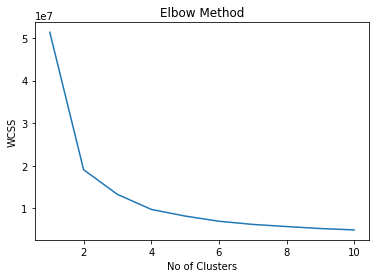

In [41]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')

In [42]:
clusters = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [43]:
print("Number of clusters:: ",clusters.knee)

Number of clusters::  3


In [44]:
kmeans = KMeans(n_clusters=clusters.knee, init='k-means++', random_state=10)

In [45]:
y_kmeans = kmeans.fit_predict(x_sampled)

In [46]:
import os
import shutil

In [47]:
model_dir = 'models/'
path = os.path.join(model_dir, 'K Means')

In [48]:
if os.path.isdir(path):
    shutil.rmtree(model_dir)
    os.makedirs(path)
else:
    os.makedirs(path)

In [49]:
with open(path+'/'+'K Means'+'.sav', 'wb') as f:
    pickle.dump(kmeans,f)

In [50]:
x_sampled['Cluster'] = y_kmeans

In [51]:
x_sampled['Labels'] = y_sampled

In [52]:
x_sampled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,Cluster,Labels
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,1.0,109.0,0.0,1.0,0.0,0.0,0.0,2,1
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,102.0,1.0,99.0,0.0,0.0,0.0,0.0,1.0,2,1
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,109.0,1.0,120.0,0.0,0.0,0.0,0.0,1.0,2,1
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,175.0,1.0,177.0,0.0,0.0,0.0,0.0,1.0,2,1
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.0,1.0,70.0,0.0,0.0,0.0,1.0,0.0,1,1


In [53]:
list_of_clusters = x_sampled['Cluster'].unique()
list_of_clusters

array([2, 1, 0])

In [95]:
def savemodel(model,model_name):
    model_dir = 'models/'
    path = os.path.join(model_dir, model_name)
    
    if os.path.isdir(path):
        shutil.rmtree(model_dir)
        os.makedirs(path)
    else:
        os.makedirs(path)
    
    with open(path+'/'+model_name+'.sav','wb') as f:
        pickle.dump(model,f)

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

In [98]:
for i in list_of_clusters:
    cluster_data = x_sampled[x_sampled['Cluster']==i]
    cluster_features = cluster_data.drop(['Labels','Cluster'],axis=1)
    cluster_label = cluster_data['Labels']
    
    x_train,x_test,y_train,y_test = train_test_split(cluster_features,cluster_label,test_size=1/3,random_state=7)
    
    #Finding best params for Knn
    knn = KNeighborsClassifier()
    param_grid_knn = {
            'algorithm':['ball_tree','kd_tree','brute'],
            'leaf_size':[10,15,20,25,30,35],
            'n_neighbors':[4,5,6,7,8,10],
            'p':[1,2]
        }
    grid_knn = GridSearchCV(knn,param_grid_knn,verbose=3,cv=5)
    grid_knn.fit(x_train,y_train)
    
    algorithm = grid_knn.best_params_['algorithm']
    leaf_size = grid_knn.best_params_['leaf_size']
    n_neighbors = grid_knn.best_params_['n_neighbors']
    p = grid_knn.best_params_['p']
    
    knn_new = KNeighborsClassifier(algorithm=algorithm,leaf_size=leaf_size,n_neighbors=n_neighbors,p=p,n_jobs=-1)
    knn_new = knn_new.fit(x_train,y_train)
    knn_predict = knn_new.predict_proba(x_test)
    
    if len(y_test.unique()) == 1:
        knn_score = accuracy_score(y_test,knn_predict)
    else:
        knn_score = roc_auc_score(y_test,knn_predict,multi_class='ovr')
    
    
    #Finding best params for Random Forest
    clf = RandomForestClassifier()
    
    param_grid_rf = {
    'n_estimators':[10,50,100,130],
    'criterion':['gini','entropy'],
    'max_depth':range(2,4,1),
    'max_features':['auto','log2']
    }
    
    grid_rf = GridSearchCV(estimator=clf,param_grid=param_grid_rf,cv=5,verbose=3)
    grid_rf.fit(x_train,y_train)
    
    criterion = grid_rf.best_params_['criterion']
    max_depth = grid_rf.best_params_['max_depth']
    max_features = grid_rf.best_params_['max_features']
    n_estimators = grid_rf.best_params_['n_estimators']
    
    clf_rf = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth,max_features=max_features)
    clf_rf = clf_rf.fit(x_train,y_train)
    predict_rf = clf_rf.predict_proba(x_test)
    
    if len(y_test.unique())==1:
        rf_score = accuracy_score(y_test,predict_rf)
    else:
        rf_score = roc_auc_score(y_test,predict_rf,multi_class='ovr')
    
    if (rf_score < knn_score):
        print('KNN', knn_new)
        best_model_name='KNN'
        best_model = knn_new
    else:
        print('Random Forest:',clf_rf)
        best_model_name='Random Forest'
        best_model=clf_rf
    
    save_model = savemodel(best_model,best_model_name+str(i))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.892, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.885, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.903, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.921, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.882, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.897, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.897, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.907, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.927, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.900, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.806, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.874, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.816, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.891, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.885, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=8, p=2, score=0.892, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=8, p=2, score=0.840, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.819, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.807, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.818, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.857, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=1, score=0.837, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=1, score=0.877, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=1, score=0.828, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.846, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.827, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.846, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_nei

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2, score=0.874, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2, score=0.859, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2, score=0.876, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2, score=0.910, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2, score=0.873, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.837, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_nei

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.849, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.868, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.898, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.856, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.874, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.859, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.861, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.876, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.909, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.876, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.849, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neig

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.870, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.901, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.859, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.873, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.862, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.873, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2,

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.927, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.901, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.871, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.874, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.901, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1,

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, score=0.886, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.892, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.897, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.927, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.901, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1,

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, score=0.927, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, score=0.903, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.888, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.882, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.895, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.927, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1,

[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.897, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.924, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.897, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.900, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.906, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.876, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.814, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.891, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.883, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.897, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.924, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.809, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.816, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.876, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.814, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=0.886, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=0.883, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, s

[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.816, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.804, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.812, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.857, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.817, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=2, score=0.816, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=2, score=

[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.846, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.828, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.840, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.892, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.840, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=10, p=1, score=0.816, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=10, p=1, score=0.804

[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, score=0.910, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, score=0.870, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.845, total=   0.2s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.834, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.836, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.874, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.831, 

[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=1, score=0.897, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=1, score=0.852, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.874, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.871, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.910, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.870, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.861, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.871, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.907, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.873, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.868, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.864, 

[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.859, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.855, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.892, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.855, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=2, score=0.874, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=2, score=0.861, 

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.592, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.583, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.583, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.596, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.596, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.590, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.595, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.593, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.590, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.581, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.583, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.641, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.634, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.649, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.640, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.647, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=log2, n_estimators=10 .
[CV]  criterion=gini, max_depth=3, max_features=log2, n_estimators=10, score=0.619, total=   0.0s
[CV] criterion=gini, max_depth=3, max_features=log2,

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.595, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.583, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.593, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.583, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.584, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=0.583, total=   0.2s
[CV] criterion=entropy, max

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.604, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.611, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.603, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.646, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.616, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.599, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   20.2s finished


KNN KNeighborsClassifier(algorithm='kd_tree', leaf_size=25, n_jobs=-1,
                     n_neighbors=4)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.936, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.942, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.953, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.936, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.948, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.951, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.924, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.921, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.945, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.938, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.946, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.952, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_n

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.925, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.925, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2, score=0.924, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2, score=0.924, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2, score=0.922, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2, score=0.924, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15,

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.925, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.932, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.928, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.928, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1, score=0.924, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1, score=0.922, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_n

[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, p=2, score=0.934, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.931, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.924, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.927, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.931, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.931, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neig

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.945, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.928, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.936, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.938, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.934, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1, score=0.931, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.939, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.938, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=6, p=2, score=0.934, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.941, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.931, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.934, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_nei

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.931, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.935, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.944, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.935, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.944, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.929, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2,

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.953, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.934, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.949, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.941, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1,

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=2, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, score=0.948, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, score=0.936, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, score=0.945, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, score=0.948, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, score=0.942, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2,

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, score=0.936, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, score=0.946, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, score=0.951, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.949, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.935, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1,

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.938, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.948, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.948, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=1, score=0.942, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.953, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.936, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2,

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.924, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.924, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.922, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.924, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=10, p=2, score=0.921, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.946, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4,

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=2, score=0.928, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1, score=0.922, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1, score=0.922, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1, score=0.927, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=1, score=0.925, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10

[CV]  algorithm=brute, leaf_size=10, n_neighbors=8, p=1, score=0.929, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=8, p=2, score=0.931, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=8, p=2, score=0.925, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=8, p=2, score=0.931, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=8, p=2, score=0.927, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=8, p=2, score=0.928, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.928,

[CV]  algorithm=brute, leaf_size=15, n_neighbors=7, p=2, score=0.938, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=7, p=2, score=0.935, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=1, score=0.932, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=1, score=0.929, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=1, score=0.927, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=1, score=0.928, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=1, score=0.929, 

[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, score=0.934, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, score=0.935, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, score=0.941, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=1, score=0.932, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, score=0.945, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, score=0.928, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, score=0.938, 

[CV]  algorithm=brute, leaf_size=25, n_neighbors=6, p=1, score=0.932, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=6, p=2, score=0.944, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=6, p=2, score=0.929, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=6, p=2, score=0.939, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=6, p=2, score=0.938, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=6, p=2, score=0.935, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=1, score=0.939, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=0.948, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=0.949, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=5, p=2, score=0.946, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=1, score=0.939, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=1, score=0.934, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=1, score=0.936, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=1, score=0.941, 

[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=0.945, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=0.936, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=0.948, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=0.946, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=1, score=0.945, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=0.953, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=5, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=5, p=2, score=0.935, 

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.826, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.842, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.836, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.842, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.839, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.859, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.874, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.874, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.866, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.861, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.862, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_e

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.898, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.900, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.887, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.893, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.893, total=   0.3s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=130 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=130, score=0.898, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=log2

[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.863, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.823, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.864, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.857, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=50, score=0.854, total=   0.1s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=100, score=0.853, total=   0.2s
[CV] criterion=entropy, max

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.877, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.880, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.898, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.900, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.894, total=   0.2s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=130 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=130, score=0.887, total=   0.2s
[CV] criterion=ent

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   21.0s finished


 KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=-1,
                     n_neighbors=4)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=10, n_nei

[CV]  algorithm=ball_tree, leaf_size=10, n_neighbors=10, p=2, score=0.998, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=15, n_ne

[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.998, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=15, n_neighbors=10, p=2 ..........
[CV]  algorithm=ball_tree, leaf_size=15,

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.998, total=   0.1s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=8, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=10, p=1 ..........
[CV]  algorithm=ball_tree, leaf_size=20, n

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=25, n_nei

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=8, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=30, n_nei

[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=1, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2 ...........
[CV]  algorithm=ball_tree, leaf_size=35, n_nei

[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=6, p=2, score=0.998, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1,

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=6, p=1,

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.998, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=6, p=1,

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, p=2,

[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.998, total=   0.1s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1,

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=2 .............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=4, p=2,

[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.998, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2 ............
[CV]  algorithm=kd_tree, leaf_size=35, n_neighbors=10, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=4, p=1 ...............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=4, p=1, scor

[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=10, n_neighbors=10, p=2 ..............
[CV]  algorithm=brute, leaf_size=10, n_neighbors=10, p=2, score=

[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=15, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=8, p=2, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=15, n_neighbors=10, p=1 ..............
[CV]  algorithm=brute, leaf_size=15, n_neighbors=10, p=1, score=0.998,

[CV]  algorithm=brute, leaf_size=20, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=20, n_neighbors=8, p=2 ...............
[CV]  algorithm=brute, leaf_size=20, n_neighbors=8, p=2, score=0.998, 

[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7, p=2 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=8, p=1 ...............
[CV]  algorithm=brute, leaf_size=25, n_neighbors=8, p=1, score=0.998, 

[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=7, p=1 ...............
[CV]  algorithm=brute, leaf_size=30, n_neighbors=7, p=1, score=0.998, 

[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=1 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=1, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=2, score=0.998, total=   0.1s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=2, score=0.998, total=   0.0s
[CV] algorithm=brute, leaf_size=35, n_neighbors=6, p=2 ...............
[CV]  algorithm=brute, leaf_size=35, n_neighbors=6, p=2, score=0.998, 

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:   44.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=50, score=0.998, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.998, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.998, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.998, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.998, total=   0.2s
[CV] criterion=gini, max_depth=3, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=3, max_features=auto, n_estimators=100, score=0.998, total=   0.1s
[CV] criterion=gini, max_depth=3, max_features=auto,

[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=0.998, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=0.998, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=auto, n_estimators=130 
[CV]  criterion=entropy, max_depth=2, max_features=auto, n_estimators=130, score=0.998, total=   0.2s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.981, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, n_estimators=10 
[CV]  criterion=entropy, max_depth=2, max_features=log2, n_estimators=10, score=0.998, total=   0.0s
[CV] criterion=entropy, 

[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.998, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.998, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.998, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=50 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=50, score=0.998, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.998, total=   0.1s
[CV] criterion=entropy, max_depth=3, max_features=log2, n_estimators=100 
[CV]  criterion=entropy, max_depth=3, max_features=log2, n_estimators=100, score=0.998, total=   0.2s
[CV] criterion=entropy, m

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   17.7s finished


In [99]:
data_p = pd.read_csv('PredictFile.csv')

In [101]:
data_p = data_p.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','TBG','TSH'], axis=1)

In [102]:
data_p.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'T3', 'TT4', 'T4U', 'FTI',
       'referral_source'],
      dtype='object')

In [105]:
for column in data_p.columns:
    count = data_p[column][data_p[column]=='?'].count()
    print(column,count)

age 0
sex 13
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
T3 56
TT4 15
T4U 23
FTI 23
referral_source 0


In [106]:
for column in data_p.columns:
    count = data_p[column][data_p[column]=='?'].count()
    if count!=0:
        data_p[column] = data_p[column].replace('?',np.nan)

In [107]:
data_p['sex'] = data_p['sex'].map({'F':0,'M':1})

In [108]:
cat_data = data_p.drop(['age','sex','T3','TT4','T4U','FTI'],axis=1)

In [109]:
for column in cat_data.columns:
    if data_p[column].nunique() == 1:
        if data_p[column].unique()[0] == 'f' or data_p[column].unique()[0]=='F':
            data_p[column] = data_p[column].map({data_p[column].unique()[0]:0})
        else:
            data_p[column] = data_p[column].map({data_p[column].unique()[0]:1})
    elif data_p[column].nunique() ==2:
        data_p[column] = data_p[column].map({'f':0,'t':1})

In [110]:
data_p = pd.get_dummies(data_p, columns=['referral_source'])

In [111]:
null_count = data_p.isna().sum()

In [113]:
imputer = KNNImputer(n_neighbors=3,weights='uniform',missing_values=np.nan)        

In [114]:
impute_x = imputer.fit_transform(data_p)

In [131]:
data_p = pd.DataFrame(data=np.round(impute_x),columns=data_p.columns)

In [132]:
def load_model(filename):
    model_dir = 'models/'
    with open(model_dir+filename+'/'+filename+'.sav','rb') as f:
        return pickle.load(f)

In [133]:
kmeans_p = load_model('K Means')

In [134]:
clusters_p = kmeans_p.predict(data_p)

In [135]:
data_p['clusters'] = clusters_p


In [136]:
clusters_p = data_p['clusters'].unique()

In [137]:
result=[]

In [138]:
with open('enc.pickle','rb') as file:
    encoder = pickle.load(file)

In [139]:
def find_model_name(cluster_num):
    cluster_num = cluster_num
    folder_name = 'models/'
    list_of_models = []
    list_of_files = os.listdir(folder_name)
    
    for file in list_of_files:
        try:
            if file.index(str(cluster_num))!=-1:
                model_name=file
        except:
            continue
    
    model_name = model_name.split('.')[0]
    return model_name

In [142]:
import pandas

In [146]:
result=[]
for i in clusters_p:
    cluster_data_p = data_p[data_p['clusters']==i]
    cluster_data_p = cluster_data_p.drop(['clusters'],axis=1)
    model_name= find_model_name(i)
    model = load_model(model_name)
    
    for val in (encoder.inverse_transform(model.predict(cluster_data_p))):
        result.append(val)

result = pandas.DataFrame(result,columns=['Predictions'])
path='Predictions.csv'
result.to_csv('Predictions.csv',header=True)